In [2]:

import sklearn.datasets as sklearn_ds
import sklearn_gbm_ots.sklearn_gbm_wrapper as sklearn_gbm_wrapper
import pandas as pd



INFO:root:loading numpy
INFO:root:loading pandas
INFO:root:loading datetime, os
INFO:root:loading from strings_utils import reduce_string
/Users/alexanderradnaev/anaconda/envs/sklearn-dev2/lib/python3.5/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [3]:

def population_mapper(x):
    if x < 1000:
        return '<1k'
    elif x < 2000:
        return '1k-2k'
    else:
        return '2k+'


def prepare_california_housing_dataframe(outcome):
    """Returns california housing dataset as a dataframe

    arguments:
        outcome - column name for the outcome"""
    housing_dataset = sklearn_ds.california_housing.fetch_california_housing()
    X = housing_dataset.data
    y = housing_dataset.target

    df_X = pd.DataFrame(X, columns = housing_dataset.feature_names)
    df_y = pd.DataFrame(y, columns = [outcome])
    df = pd.concat([df_X, df_y], axis = 1)
    df['Population'] = df['Population'].apply(population_mapper)

    return df


In [4]:
outcome = 'house price, 100k'
df = prepare_california_housing_dataframe(outcome)


In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,"house price, 100k"
0,8.3252,41.0,6.984127,1.023810,<1k,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2k+,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,<1k,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,<1k,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,<1k,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,<1k,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1k-2k,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1k-2k,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1k-2k,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1k-2k,2.172269,37.84,-122.25,2.611


INFO:root:detected categorical_features: ['Population']
INFO:root:Cross-validation parameter optimization started.


preparing folder for "./gbm_output/temp.txt"
categorical_indecies: {8: 'Population', 9: 'Population', 7: 'Population'}


INFO:root:fitted cv model #1/5
INFO:root:fitted cv model #2/5
INFO:root:fitted cv model #3/5
INFO:root:fitted cv model #4/5
INFO:root:fitted cv model #5/5
DEBUG:root:cv_n_trees: 497
DEBUG:root:cv1se_val: 0.2323795374209226
DEBUG:root:cv1se_n_trees: 206
INFO:root:minium cv error at 497 trees
INFO:root:minimum cv error within 1 std at 206 trees
INFO:root:selected n_trees: 206
INFO:root:plotting all trees training curves
INFO:root:gbm fitting...
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/alexanderradnaev/anaconda/envs/py2.7/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/alexanderradnaev/anaconda/envs/py2.7/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaV

rmse: 0.49, variance explained: 82%
house price, 100k standard deviation: 1.17,prediction error std: 0.49,average absolute error: 0.33
rmse: 0.49, variance explained: 82%
house price, 100k standard deviation: 1.17,prediction error std: 0.49,average absolute error: 0.33


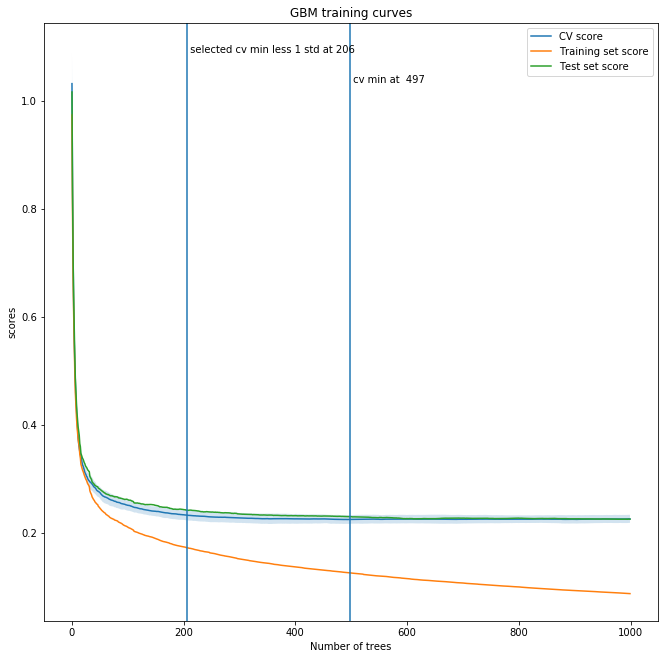

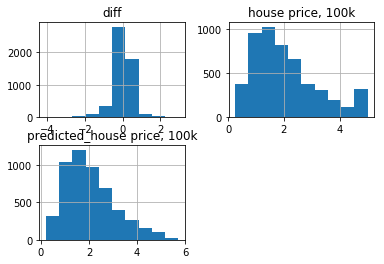

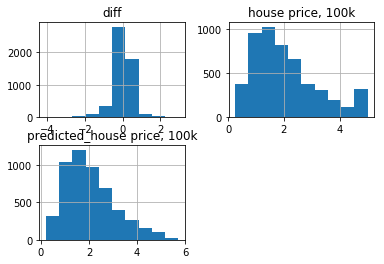

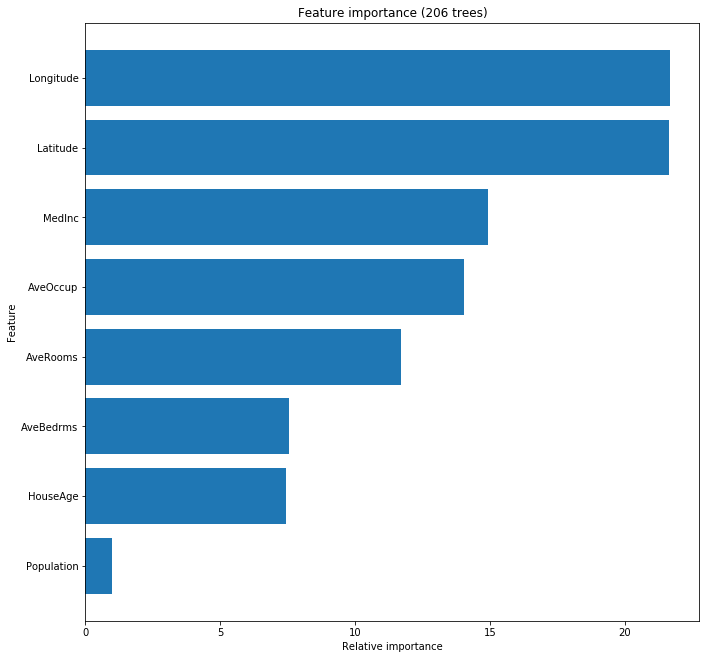

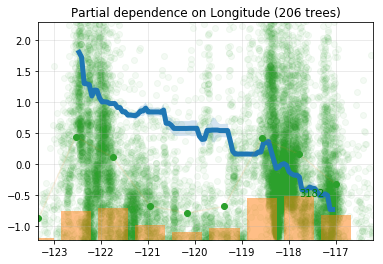

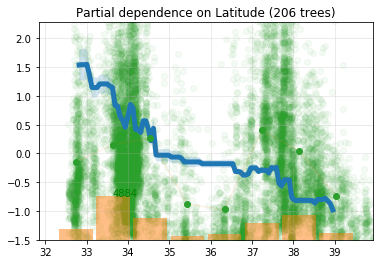

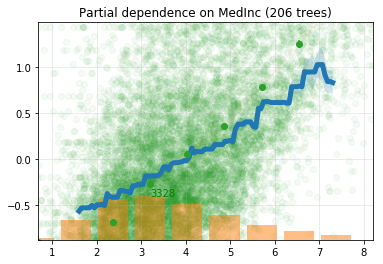

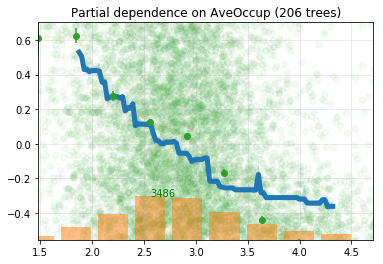

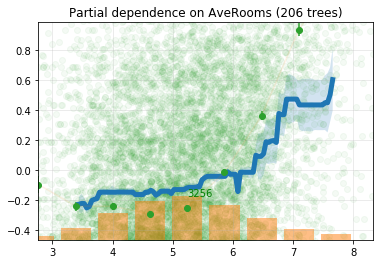

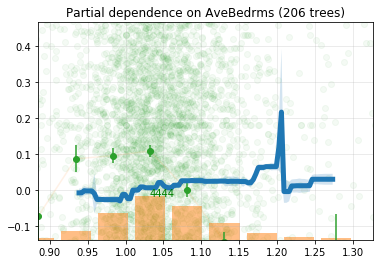

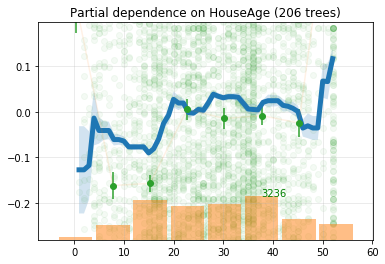

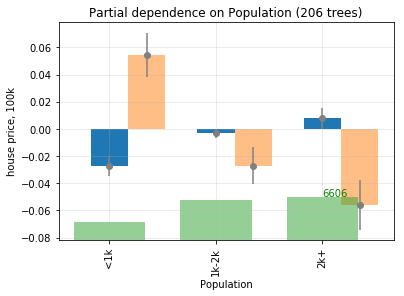

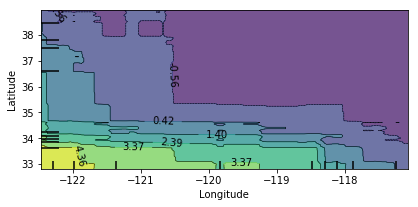

In [6]:
housing_gbm = sklearn_gbm_wrapper.GBMwrapper(
    df,
    outcome)

gbm_params = {
    'n_estimators': 1000,
    'max_depth': 3,
    'max_features': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'learning_rate': 0.3,
    'loss': 'ls'}

gbm = housing_gbm.build_model(params = gbm_params)


INFO:root:plotting feature importances and partial dependences


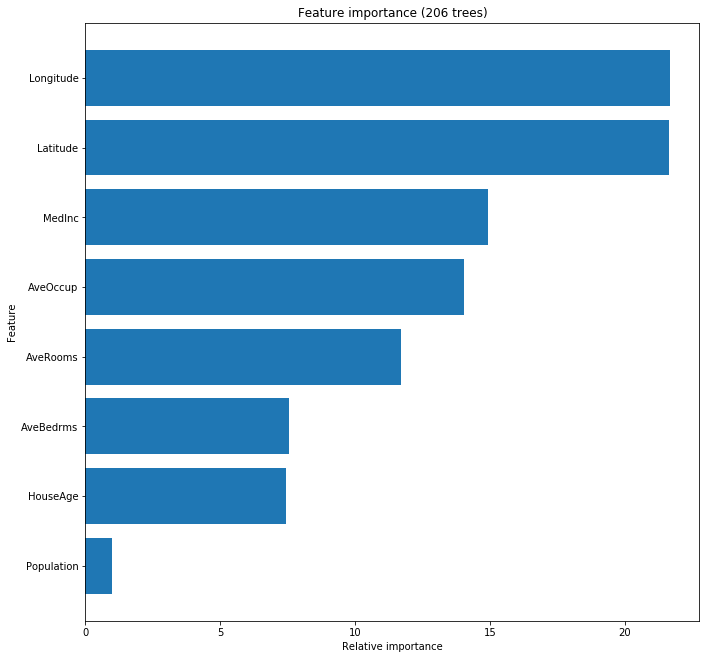

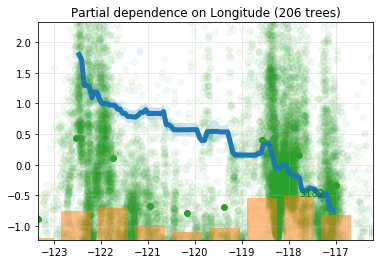

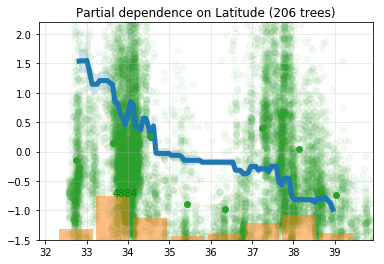

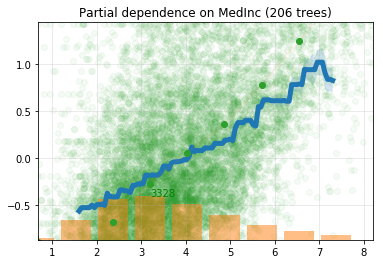

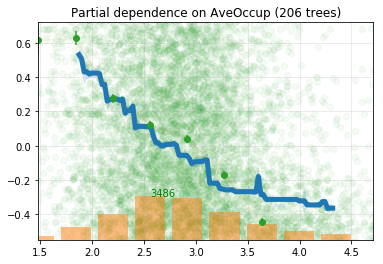

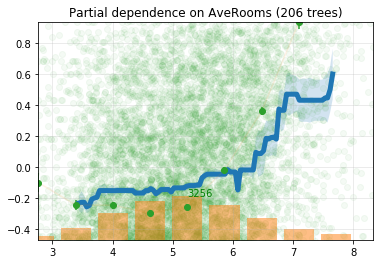

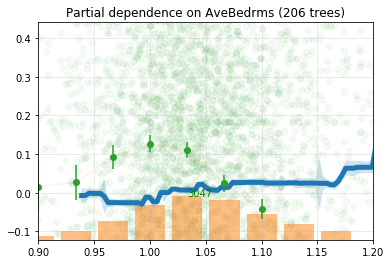

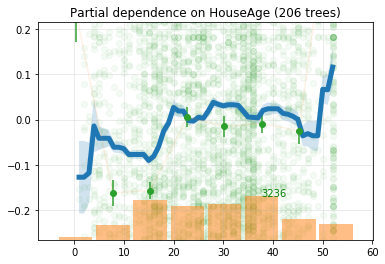

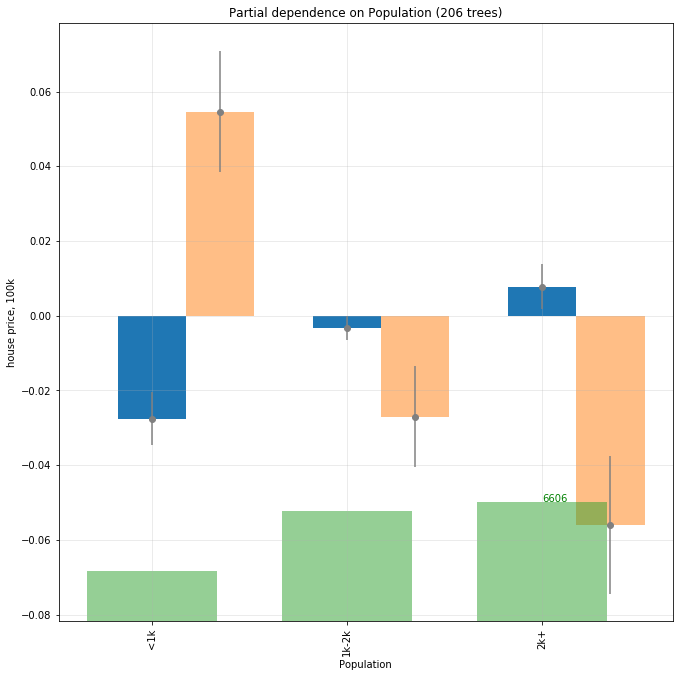

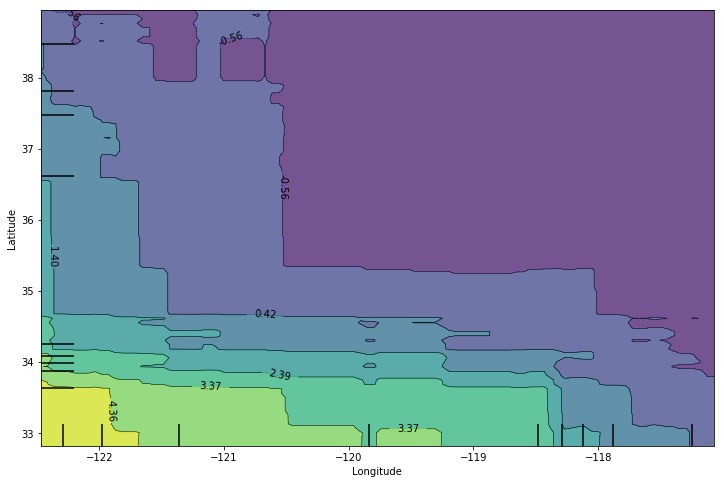

In [7]:
housing_gbm.plot_output(
    ax_limits = {'AveBedrms': {'xlim': [0.9, 1.2]}},
    figsize = (11, 11))

In [8]:
help(housing_gbm)

Help on GBMwrapper in module sklearn_gbm_ots.sklearn_gbm_wrapper object:

class GBMwrapper(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, df_dataset, outcome, weights_col_name=None, features_list=None, impute_NAs=True, tail_threshold=10, destination_dir='./gbm_output/', ax_limits_per_feature=None)
 |      Creates gbm object for future modeling.
 |      
 |      arguments:
 |          df_dataset - dataframe with all data:
 |              numeric/ categorical features, and the outcome
 |          outcome - column name with the outcome
 |          features_list - list of strings representing features columns.
 |              by default all columns will be used except the oucome
 |          impute_NAs - flag to fill NAs with median values
 |          tail_threshold - minimum number of observations per given category.
 |              Categories with smaller counts will be merged to 'Other'
 |          destination_dir - directory where output files will be saved
 |       